<a href="https://colab.research.google.com/github/DanielOspinaMartin/Prediccion_precio_vehiculos/blob/main/Modelo_prediccion_valor_vehiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>**Abstracto** </font>

El objetivo es crear un modelo que pueda predecir los precios de los automoviles teniendo en cuenta algunas de las variables a las que se tiene acceso en este data set, tales como año de producción `year_produced`, el valor del odometro `odometer_value`, número de veces que el auto ha sido modificado `up_counter`, nombre del modelo `model_name` y el tipo del cuerpo `body_type`.

Audiencia ojetivo, la gerencia del catalogo de ventas de autos para con pocos datos estimar el valor de venta de un auto y así proyectar rapidamente utilidades, (esto podría optimiazar tiempos para saber al que precio se podría vender un vehiculo pues el vendedor, inicialmente, solo debería llevar ciertos datos del vehiculo).

fuente https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog/data

# <font color=blue>**Contexto comercial** </font>

El data set fue extraido de varias publicaciones en la web del país Belarus del oeste de Europa. Esto con la finalidad de predecir de forma más concisa y rápida el valor de un vehiculo, de está forma se podría dar un valor **estimado** de venta a un vehiculo sin la necesidad de ver el vehiculo en persona.


# <font color=blue>**Contexto analítico** </font>

El dataset consta de 38.531 registros y 30 columnas de las cuales se tuvieron que eliminar 10 pues no aportaban información, estas son las variables que se tendrán en cuenta para hacer un análisis exploratorio de datos:

`manufacturer_name`-----------Marca del vehiculo

`model_name`------------ Modelo del auto

`transmission`------------- tipo de transmisión

`color`------------- color del vehiculo

`odometer_value`------------- valor del odometro

`year_produced`--------------- Año de producción del vehiculo

`engine_fuel`------------------ tipo de conbustible

`engine_has_gas`----------------- ¿El auto funciona también con gas?

`engine_capacity`---------------- capacidad de combustible del motor

`body_type`--------------------- tipo de auto

`has_warranty`-------------------- ¿tiene garantia?

`state`------------------------ Estado del vehculo (nuevo, usado)

`drivetrain`-------------------- ubicación de la tracción

`price_usd`--------------------- precio del vehiculo

`is_exchangeable`------------------ se recibe otro vehiculo como pago o parte de pago

`location_region`------------------ ubicación del auto

`number_of_photos`--------------- número de fotos del vehiculo en el cátalogo

`up_counter`--------------------- número de veces que el vehiculo ha sido modificado

`duration_listed`--------------- días que lleva el vehiculo publicado en el cátalogo

# <font color=blue>**Hipótesis** </font>
 - ¿Es una regresión polinomial el mejor modelo para predecir el valor de los vehículos?


# <font color=blue> **Entendimiento de los datos** </font>

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error



# urlSegundoDataset = 'https://drive.google.com/uc?id='
# extSegundoDataset = '1VfgJvp9gC67QcBUDNsTKCEFwMCHUSj8W'
# dfSegundo = pd.read_csv(urlSegundoDataset+extSegundoDataset)

dfSegundo = pd.read_csv('cars.csv')

In [ ]:
dfSegundo.head()

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True     False       True      False   
1  ...      True      False     False      True       True      False   
2  ...      True      False     False     False      False      False   
3  ...     False      False     False     False      False      False   
4  ...      True      False      True      True      False      False   

  feature_7  feature_8  feature_9  duration_listed  
0      True       True       True               16  
1     False      False       True               83  
2     False       True       True              151  
3     False      False      False               86  
4     False      False       True                7  

[5 rows x 30 columns]

In [ ]:
dfSegundo.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

###Se detecta que el precio mínimo del vehículo es de 1 dólar, lo cual claramente es un outlier.

In [ ]:
dfSegundo.describe().T

count           mean            std     min       25%  \
odometer_value    38531.0  248864.638447  136072.376530     0.0  158000.0   
year_produced     38531.0    2002.943734       8.065731  1942.0    1998.0   
engine_capacity   38521.0       2.055161       0.671178     0.2       1.6   
price_usd         38531.0    6639.971021    6428.152018     1.0    2100.0   
number_of_photos  38531.0       9.649062       6.093217     1.0       5.0   
up_counter        38531.0      16.306091      43.286933     1.0       2.0   
duration_listed   38531.0      80.577249     112.826569     0.0      23.0   

                       50%       75%        max  
odometer_value    250000.0  325000.0  1000000.0  
year_produced       2003.0    2009.0     2019.0  
engine_capacity        2.0       2.3        8.0  
price_usd           4800.0    8990.0    50000.0  
number_of_photos       8.0      12.0       86.0  
up_counter             5.0      16.0     1861.0  
duration_listed       59.0      91.0     2232.0

In [ ]:
dfSegundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

# <font color=blue> **Preparación de los datos** </font>

## <font color=blue> **Formato de datos** </font>


### Del entendimiento de los datos se encontraron las columnas feature que no aportan al análisis, tampoco aparece el significado de estás variables en la fuente de los datos. Se procede a eliminarlas.


In [ ]:
for i in range(0,10):
  dfSegundo.drop('feature_'+str(i),axis=1,inplace=True)

### Hay varias variables categóricas como `manufacturer_name`, `model_name`,`transmission`,`drivetrain`,`engine_fuel` y `body_type` para evitar posibles problemas en errores de escritura de los strings se hace un tratamiento a estas columnas.

### 1) Se eliminan posibles espacios innecesarios al inicio o final de los string.
### 2) Se utiliza el formato title en los strings para no tener inconvenientes del tipo: la marca BMW esta escrita como BMW en algunos registros y en otros bmw.




In [ ]:
for i in ['state','drivetrain','body_type','engine_type','engine_fuel','transmission','model_name','color']:
  dfSegundo[i] = dfSegundo[i].apply(lambda x: str(x).strip().title())

In [ ]:
dfSegundo.sample(2)

manufacturer_name model_name transmission  color  odometer_value  \
27179            Nissan    Primera   Mechanical  Black          352000   
25624           Hyundai   Santa Fe    Automatic  Black          147000   

       year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
27179           2004    Gasoline           False    Gasoline              1.6   
25624           2013      Diesel           False      Diesel              2.2   

      body_type  has_warranty  state drivetrain  price_usd  is_exchangeable  \
27179     Sedan         False  Owned      Front     4000.0             True   
25624       Suv         False  Owned      Front    20690.0            False   

        location_region  number_of_photos  up_counter  duration_listed  
27179  Могилевская обл.                 6           2              134  
25624      Минская обл.                10           2               56

##<font color=blue> **Outliers** </font>

### La variable a predecir es price_usd, entonces observamos sus outliers

In [ ]:
px.box(dfSegundo,
        x = 'price_usd',
       title='Box plot para la variable price_usd, para identificar outliers'
      ).show()

In [ ]:
px.histogram(dfSegundo,
        x = 'price_usd',
       title='histograma para la variable price_usd, para identificar outliers'
      ).show()

### Se identifican algunos outliers, vehículos con un precio bastante elevado, o un precio muy bajo

### el upper fence tiene un valor de 19.225 dólares

In [ ]:
np.quantile(dfSegundo['price_usd'],q=0.75)+ 1.5*(np.quantile(dfSegundo['price_usd'],q=0.75)-np.quantile(dfSegundo['price_usd'],q=0.25))

19325.0

### 4.5% del catálogo tiene precios superiores a este valor

In [ ]:
dfSegundo[dfSegundo['price_usd']>19225].shape[0]/dfSegundo.shape[0]

0.04546988139420207

### Se eliminan los registros con valores puperiores al upper fence 19.225

### también para eliminar casos de vehículos vendidos en un dolar o precios muy bajos se procede a eliminar  el 5% del dataset tomando el centil 5.

### Esta decición se toma dado que no hay alguna columna que especifique si el vehículo es de una categoría premium, además los datos con valores elevados o muy bajos no llegan al 10% del total del dataset y estos valores pueden sesgar a nuestro modelo predictivo.

In [ ]:
np.quantile(dfSegundo['price_usd'],q=0.955)

19450.0

In [ ]:
np.quantile(dfSegundo['price_usd'],q=0.05)

650.0

In [ ]:
dfSegundo = dfSegundo[dfSegundo['price_usd']<=19325].copy()
dfSegundo = dfSegundo[dfSegundo['price_usd']>650].copy()

## <font color=blue> **Tratamiento de datos nulos** </font>

In [ ]:
dfSegundo.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

###Los datos nulos corresponden a vehículos electricos, solo hay 8, entonces se procede a eliminarlos.

In [ ]:
dfSegundo.dropna(inplace=True)
dfSegundo.reset_index(inplace=True,drop=True)
dfSegundo.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

## <font color=blue> **Datos duplicados** </font>

In [ ]:
dfSegundo.duplicated().sum()

37

### Se encuentran alguno datos duplicados se procede a eliminar los duplicados conservando solo la primera ocurrencia.

In [ ]:
dfSegundo.drop_duplicates(keep='first', inplace=True, ignore_index=True)

# <font color=blue> **Análisis exploratorio de datos (EDA)** </font>

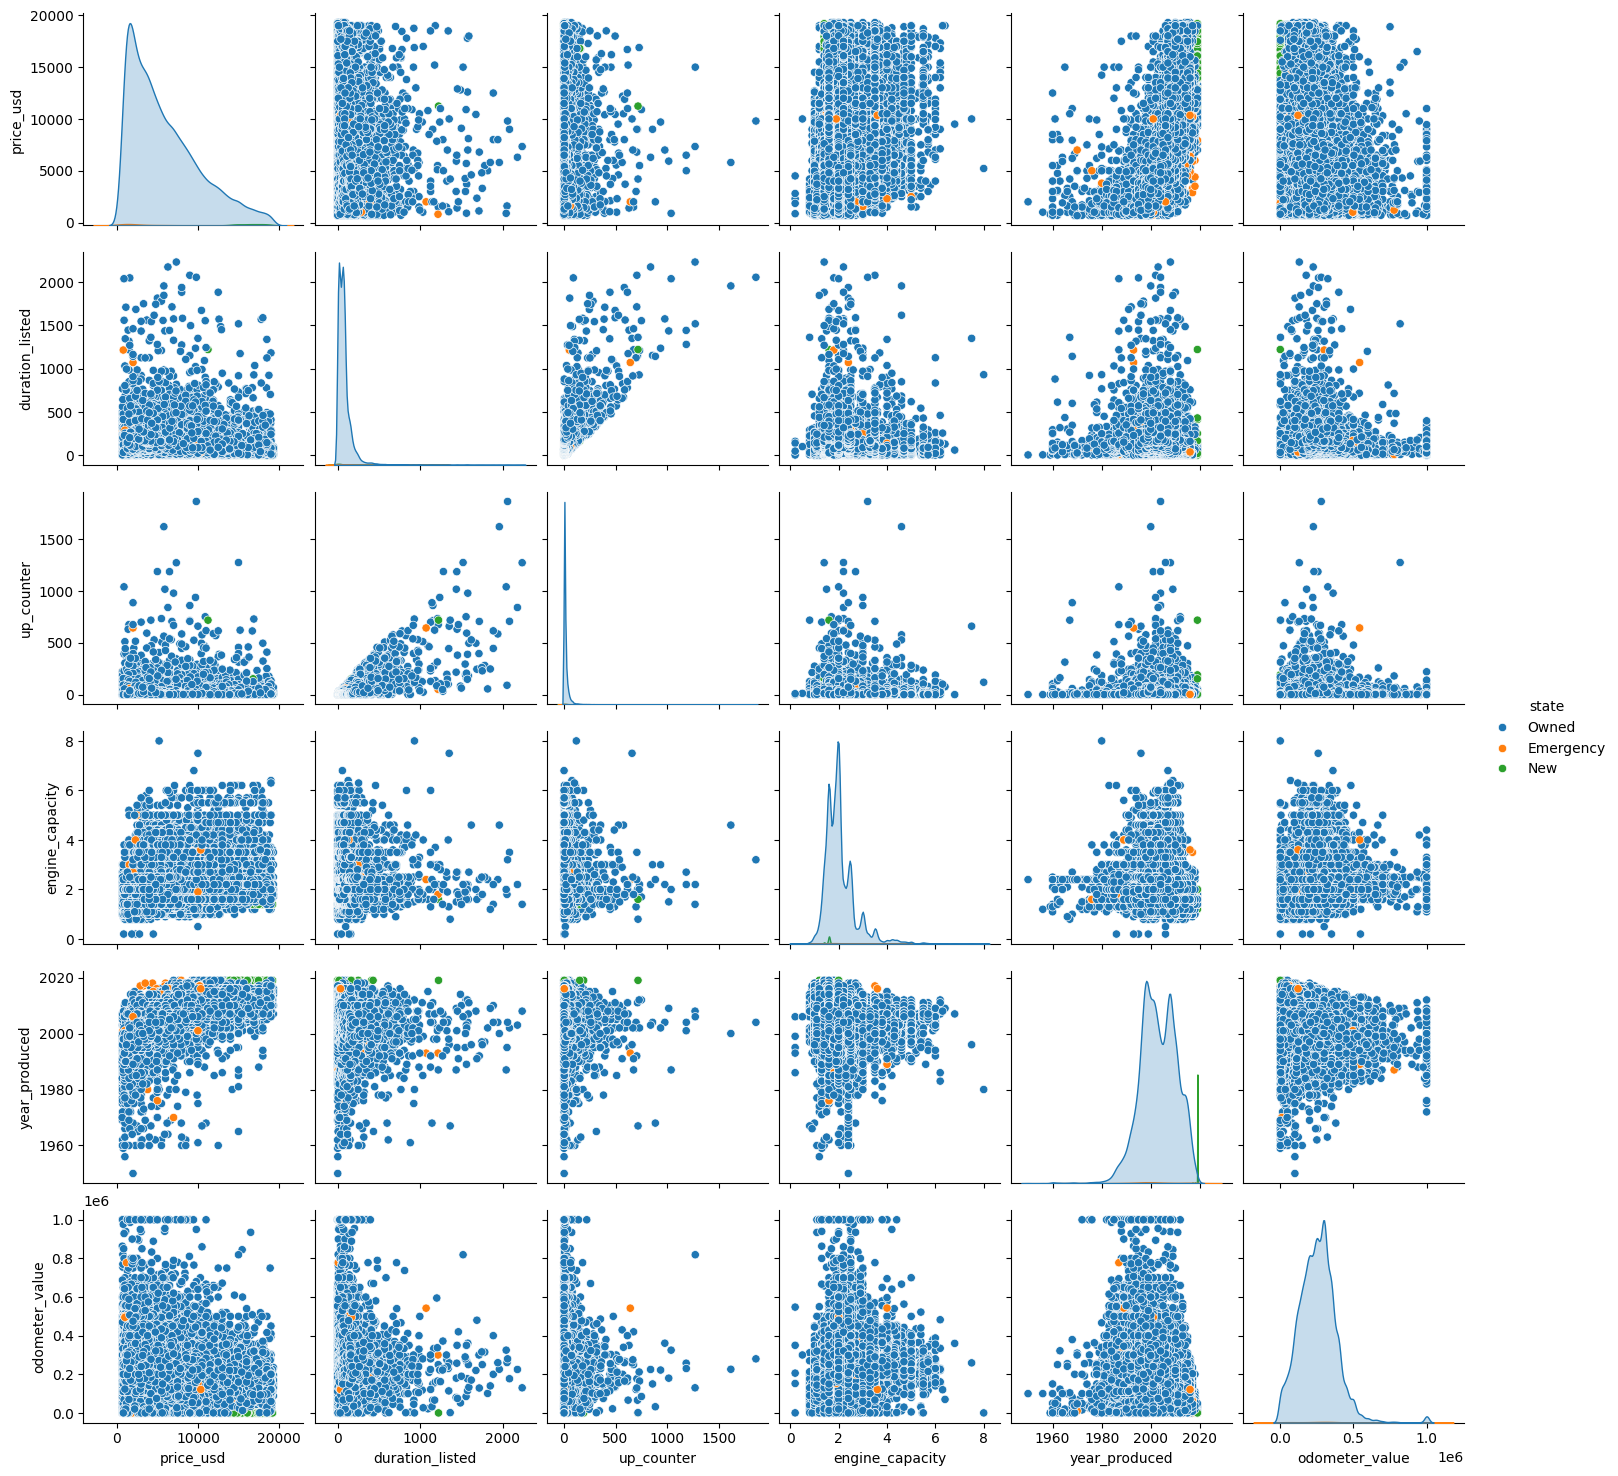

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(dfSegundo[['price_usd','duration_listed','up_counter','engine_capacity','year_produced','odometer_value','state']],hue='state')
plt.show()

### Se observa una relación entre las variables odometer_value,year_produced con la variable price_usd

### Al realizar un scatter plot de año de producción vs Precio en US, vemos que hay una leve tendencia a que los autos con año de producción más reciente tienen un precio más elevado, sin embargo hay demasiados autos con un año de producción reciente y un precio no muy elevado

In [ ]:
px.scatter(dfSegundo,
           x = 'year_produced',
           y = 'price_usd',
           color = 'price_usd',
           labels = {'year_produced':'Año de producción','price_usd':'Precio en dólares'},
           title='Año de producción vs precio en dólares',
          height=500,
          width=800).show()

### Si se realiza la misma gráfica pero teniendo en cuenta el modelo de los vehiculos se evidencia una relación más clara entre el año de producción  y el precio en US

In [ ]:
count_modelo = pd.pivot_table(dfSegundo,
              index='model_name',
              values='price_usd',
              aggfunc='count').rename(columns={'price_usd':'Count'}).sort_values('Count',ascending=False).reset_index()
count_modelo['Porcentaje_del_total'] = 100*count_modelo['Count'] / count_modelo['Count'].sum()

for i in count_modelo.head(3)['model_name']:
    px.scatter(dfSegundo[dfSegundo['model_name']==i],
           x = 'year_produced',
           y = 'price_usd',
           color = 'price_usd',
           labels = {'year_produced':'Año de producción','price_usd':'Precio en dólares'},
           title='Año de producción vs precio en dólares modelo '+i,
          height=500,
          width=800).show()

### Con lo cual, la variable de modelo del vehículo será una variable categórica últil para agrupar y ver el comportamiento del costo de los vehículos.

### <font color=blue> **Outliers de la varible year_produced**  </font>

#### Como es una variable muy realacionada al precio del vehículo es importante tratar sus outliers

In [ ]:
px.box(dfSegundo,
        x = 'year_produced',
       title='Box plot para la variable year_produced, para identificar outliers'
      ).show()

In [ ]:
px.histogram(dfSegundo,
        x = 'year_produced',
       title='Box plot para la variable year_produced, para identificar outliers'
      ).show()

In [ ]:
dfSegundo = dfSegundo[dfSegundo['year_produced']>=1980].copy()

### <font color=blue> **Outliers en la variable de odometer** </font>

In [ ]:
px.scatter(dfSegundo,
       x = 'odometer_value',
       y = 'price_usd',
       color = 'price_usd',
       labels = {'odometer_value':'valor odometro','price_usd':'Precio en dólares'},
       title='valor del odometro vs precio en dólares',
      height=500,
      width=800).show()

#### Haciendo las gráficas de valor del odometro, se observa otra relación sin embargo, parece que el odometro afecta mucho el valor del vehiculo solo en los primeros kilometros, además de que hay autos con un valor de odometro muy bajo y con un precio muy bajo, nuevamente se ve una mejor relación entre el odometro y el valor del vehículo si se filtra por modelo del vehículo

In [ ]:
count_modelo = pd.pivot_table(dfSegundo,
              index='model_name',
              values='price_usd',
              aggfunc='count').rename(columns={'price_usd':'Count'}).sort_values('Count',ascending=False).reset_index()
count_modelo['Porcentaje_del_total'] = 100*count_modelo['Count'] / count_modelo['Count'].sum()

for i in count_modelo.head(3)['model_name']:
    px.scatter(dfSegundo[dfSegundo['model_name']==i],
           x = 'odometer_value',
           y = 'price_usd',
           color = 'price_usd',
           labels = {'odometer_value':'valor odometro','price_usd':'Precio en dólares'},
           title='valor del odometro vs precio en dólares modelo '+i,
          height=400,
          width=750).show()

In [ ]:
px.box(dfSegundo,
        x = 'odometer_value',
       title='Box plot para la variable odometer_value, para identificar outliers',
       height=500,
       width=800
      ).show()

In [ ]:
px.histogram(dfSegundo,
        x = 'odometer_value',
       title='Histograma para la variable odometer_value, para identificar outliers',
       width=800,
       height=500
      ).show()

#### Para la vida útil del motor de  un vehículo esta al rededor de los 520.0000 kilométros, con lo cual se decide elimiar algunos registros con valores de odometro que superen este valor.

In [ ]:
np.quantile(dfSegundo['odometer_value'],q=0.98)

522000.0

In [ ]:
dfSegundo= dfSegundo[dfSegundo['odometer_value']<520000].copy()

## <font color=blue> **Variable model_name**</font>

#### Se observó que el `model_name` también es una varibale que influye en el precio de un vehículo con lo cual, se estudiará esta variable para ver si está balanceada y también ver las medidas de tendencia central de cada modelo de vehículo.

In [ ]:
dfSegundo['model_name'].value_counts()

model_name
Passat          1338
Astra            711
A6               641
Golf             635
Mondeo           558
                ... 
Gol                1
Elysion            1
S1000              1
T6 Caravelle       1
Aspen              1
Name: count, Length: 1011, dtype: int64

In [ ]:
df_models = pd.pivot_table(dfSegundo,
              index='model_name',
              values='price_usd',
              aggfunc=['min','mean','median','max','count'],
              sort=False).reset_index()
df_models.columns = ['model_name','min','mean','median','max','count']
df_models.sort_values('mean',ascending=False).head(30)

model_name       min          mean    median       max  count
208             Paceman  19100.00  19100.000000  19100.00  19100.00      1
943             S63 Amg  19000.00  19000.000000  19000.00  19000.00      1
110              Spider  19000.00  19000.000000  19000.00  19000.00      1
95          Grandland X  18995.00  18995.000000  18995.00  18995.00      1
938               Gl350  18400.00  18661.250000  18661.25  18922.50      2
328                Edge  18600.00  18600.000000  18600.00  18600.00      1
616                 Mkc  18600.00  18600.000000  18600.00  18600.00      1
323                F150  18500.00  18500.000000  18500.00  18500.00      1
35                 1500  18000.00  18450.000000  18450.00  18900.00      2
817                  Jx  18300.00  18300.000000  18300.00  18300.00      1
930              Glk300  17800.00  18266.666667  18500.00  18500.00      3
848           Crosstour  17600.00  18200.000000  18200.00  18800.00      2
949                G500  18000.00  18000.000000  18000.00  18000.00      1
123                 Tlx  18000.00  18000.000000  18000.00  18000.00      1
764                  М5  18000.00  18000.000000  18000.00  18000.00      1
958              Cla180  17999.00  17999.000000  17999.00  17999.00      1
929                G400  17999.00  17999.000000  17999.00  17999.00      1
407              Amarok  16750.00  17824.500000  17824.50  18899.00      2
794  Range Rover Evoque  17500.00  17749.500000  17749.50  17999.00      2
786                Cx-3  17500.00  17700.000000  17700.00  17900.00      2
920              Cla200  15500.00  17520.000000  17900.00  19000.00      5
742        Gran Turismo  16835.82  17505.636667  17600.00  18000.00      6
759                 635  15900.00  17466.666667  17500.00  19000.00      3
738                  X6  14899.00  17319.603448  17500.00  19000.00     29
758                X6 M  17310.06  17310.060000  17310.06  17310.06      1
341      Tourneo Custom  17300.00  17300.000000  17300.00  17300.00      1
472                  A7  13990.00  17206.500000  17924.50  18900.00      6
68               Mohave  16500.00  17150.000000  17150.00  17800.00      2
816                   Q  16900.00  17075.000000  17075.00  17250.00      2
757                 218  15900.00  17063.333333  16900.00  18390.00      3

### Dado que los modelos de los cuale solo hay 1 muestra son aquellos más costosos estos datos pueden sesgar el modelo a entrenar. se procede a eliminar los registros cuyo modelo no tenga por lo menos 10 muestras

In [ ]:
df_out_modelos = pd.DataFrame(dfSegundo['model_name'].value_counts()).reset_index()
df_out_modelos.columns= ['model_name','Count']
dfSegundo = pd.merge(dfSegundo,df_out_modelos,how='left',on='model_name')
dfSegundo = dfSegundo[dfSegundo['Count']>= 10].copy()
dfSegundo.drop('Count',axis=1,inplace=True)

### Se genera un boxplot del `price_usd` agrupando por modelo de vehículo con la finalidad de ver decidir qué valores se consideran outliers para cada grupo.

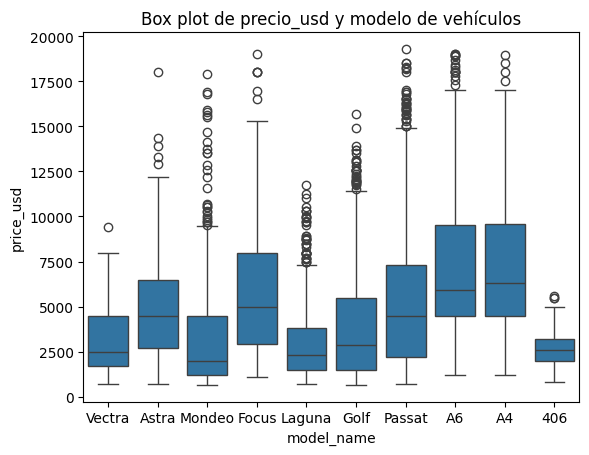

In [ ]:
top = list(df_out_modelos['model_name'].head(10))
sns.boxplot(data=dfSegundo[dfSegundo['model_name'].isin(top)], x="model_name", y="price_usd").set(title='Box plot de precio_usd y modelo de vehículos')
plt.show()

### Se crea una variable `model_name_year_produced` que concatena el `model_name` y el `year_produced`. Se identifican como outliers a los vehículos con `price_usd` superiores al upper fence o inferiores al lower_fence de la variable `price_usd` agrupada por su respecrivo `model_name_year_produced`.


### Para los outliers mayores a upper fence se reemplazará el valor por el quantil q(0.80) y para los outliers menores al lower fence se reemplazará con el quantil q(0.20) de su respectivo `model_name_year_produced`.

In [ ]:
dfSegundo['model_name_year_produced'] =  dfSegundo.apply(lambda dfSegundo: dfSegundo['model_name']+'_'+str(dfSegundo['year_produced']),axis=1 ) # Se crea una columan que concatena el nombre del modelo y el año de producción
for i in list(dfSegundo['model_name_year_produced'].value_counts().index):
  column = dfSegundo[dfSegundo['model_name_year_produced']==i]['price_usd'] # Se obtienen todos los price_usd del respectivo model_name_year_produced
  q80 = np.quantile(dfSegundo[dfSegundo['model_name_year_produced']==i]['price_usd'],q=0.8) # se obtiene el q80 del respectivo model_name_year_produced
  q20 = np.quantile(dfSegundo[dfSegundo['model_name_year_produced']==i]['price_usd'],q=0.2) # se obtiene el q20 del respectivo model_name_year_produced
  upper_fence = np.quantile(column,q=0.75)+ 1.5*(np.quantile(column,q=0.75)-np.quantile(column,q=0.25))
  lower_fence = np.quantile(column,q=0.25)- 1.5*(np.quantile(column,q=0.75)-np.quantile(column,q=0.25))

  dfSegundo['price_usd'] =  np.where((dfSegundo['model_name_year_produced']==i)&(dfSegundo['price_usd']>upper_fence),
                                  q80,
                                  dfSegundo['price_usd'])   # se reemplazan lo outliers del respectivo model_name_year_produced que son superiores al upper fence

  dfSegundo['price_usd'] = np.where((dfSegundo['model_name_year_produced']==i)&(dfSegundo['price_usd']<lower_fence),
                                  q20,
                                  dfSegundo['price_usd'])  # se reemplazan lo outliers del respectivo model_name_year_produced que son inferiores al lower fence

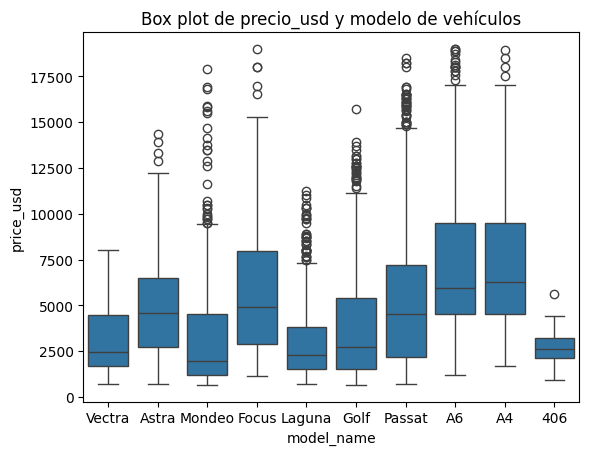

In [ ]:
sns.boxplot(data=dfSegundo[dfSegundo['model_name'].isin(top)], x="model_name", y="price_usd").set(title='Box plot de precio_usd y modelo de vehículos')
plt.show()

## <font color=blue> **Otras variables categóricas con outliers** </font>

### Dado que la variable categórica `model_name` y el `yer_produced` son tan importantes para el precio del vehículo se observarán todos los outliers de las variables categóricas (`transmission`, `body_type`, `state`, `manufacturer_name`, `drivetrain` ) teniendo encuenta a la variable `model_name_year_produced`.

### Se identifican como outliers de una variable categórica a los vehículos con precios superiores al upper fence o inferiores al lower fence de su respectiva categoria de la variable categórica y filtrando por su respectivo `model_name_year_produced`.

### Por ejemplo, si el `price_usd` de un vehículo con `model_name_year_produced` Astra_2001 y `state` Owned es superior al upper fence resultante del boxplot de todos los vehículos modelo Astra 2001 con estado Owned, este vehículo se considera un outlier.

### Se tratará a los outliers de cada categoría siguiente forma:
#### 1) Se identifica a los outliers de cada categoría (con el proceso descrito anteriormente).
#### 2) A los outliers superiores al upper fence (de su respectiva categoría y modelo) se les reemplaza con el valor del upper fence.
#### 3) A los outliers inferiores al lower fence (de su respectiva categoría y modelo) se les reemplaza con el valor del lower fence.

In [ ]:
dfSegundo['transmission'].value_counts()

transmission
Mechanical    21758
Automatic     10410
Name: count, dtype: int64

In [ ]:
dfSegundo['body_type'].value_counts()

body_type
Sedan        10887
Hatchback     6542
Universal     5019
Suv           3790
Minivan       3362
Minibus       1002
Van            605
Liftback       482
Coupe          381
Pickup          52
Cabriolet       37
Limousine        9
Name: count, dtype: int64

In [ ]:
dfSegundo['state'].value_counts()

state
Owned        31864
New            161
Emergency      143
Name: count, dtype: int64

In [ ]:
dfSegundo['manufacturer_name'].value_counts()

manufacturer_name
Volkswagen       3753
Opel             2540
Renault          2264
BMW              2149
Audi             2130
Ford             2058
Peugeot          1796
Mercedes-Benz    1573
Citroen          1429
Nissan           1169
Mazda            1126
Toyota           1061
Hyundai           955
Skoda             828
Kia               792
Mitsubishi        767
Honda             716
Fiat              674
Volvo             603
Chrysler          369
Chevrolet         358
Subaru            260
Seat              257
Dodge             241
ВАЗ               217
Rover             215
Suzuki            194
Daewoo            170
Alfa Romeo        166
Lexus             141
LADA              129
Land Rover        129
Infiniti          125
Saab               96
Iveco              94
Jeep               66
SsangYong          60
ГАЗ                54
Lancia             52
Dacia              51
Mini               47
Buick              40
УАЗ                39
Chery              35
Porsche       

In [ ]:
for j in ['transmission','body_type','state','manufacturer_name','drivetrain']:
  for i in list(dfSegundo[j].value_counts().index):
    q1 = dfSegundo[dfSegundo[j]==i].groupby('model_name_year_produced')['price_usd'].quantile(q=0.25).reset_index()
    q3 = dfSegundo[dfSegundo[j]==i].groupby('model_name_year_produced')['price_usd'].quantile(q=0.75).reset_index()
    fences = pd.merge(q1,q3,on='model_name_year_produced',how='left')
    fences.columns = ['model_name_year_produced','q1','q3']

    fences['upper_fence'] = fences.apply(lambda fences: fences['q3'] + 1.5*(fences['q3']-fences['q1']),axis=1)
    fences['lower_fence'] = fences.apply(lambda fences: fences['q1'] - 1.5*(fences['q3']-fences['q1']),axis=1)
    fences.drop(['q1','q3'],axis='columns',inplace=True)

    dfSegundo = pd.merge(dfSegundo,fences,on='model_name_year_produced',how='left')

    dfSegundo['price_usd'] = np.where(dfSegundo[j]!=i,
                                      dfSegundo['price_usd'],
                                      np.where(dfSegundo['price_usd']>dfSegundo['upper_fence'],
                                               dfSegundo['upper_fence'],
                                               dfSegundo['price_usd']
                                      ))

    dfSegundo['price_usd'] = np.where(dfSegundo[j]!=i,
                                      dfSegundo['price_usd'],
                                      np.where(dfSegundo['price_usd']<dfSegundo['lower_fence'],
                                               dfSegundo['lower_fence'],
                                               dfSegundo['price_usd']
                                      ))

    dfSegundo.drop(['upper_fence','lower_fence'],axis='columns',inplace=True)

## <font color=blue> **Outliers que pueden afecatar el rendimiento modelo de predicción** </font>

### A pesar del exhaustivo tratamiento de los outliers aún hay algunas entradas del dataset que siguen estando muy dispersos, estas entradas corresponden a vehículos antiguos que se ofrecen a valores muy altos

In [ ]:
px.scatter(dfSegundo,
           x = 'year_produced',
           y = 'price_usd',
           color = 'price_usd',
           labels = {'year_produced':'Año de producción','price_usd':'Precio en dólares'},
           title='Año de producción vs precio en dólares ',
          height=500,
          width=800).show()

### se decide eliminar todos los datos de vehículos con año de producción inferior a 1995 y que se vendieron a un precio superior a 7000 dólares (solo 19 casos)

In [ ]:
dfSegundo[(dfSegundo['year_produced']<=1995)&(dfSegundo['price_usd']>7000)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 7302 to 29732
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer_name         19 non-null     object 
 1   model_name                19 non-null     object 
 2   transmission              19 non-null     object 
 3   color                     19 non-null     object 
 4   odometer_value            19 non-null     int64  
 5   year_produced             19 non-null     int64  
 6   engine_fuel               19 non-null     object 
 7   engine_has_gas            19 non-null     bool   
 8   engine_type               19 non-null     object 
 9   engine_capacity           19 non-null     float64
 10  body_type                 19 non-null     object 
 11  has_warranty              19 non-null     bool   
 12  state                     19 non-null     object 
 13  drivetrain                19 non-null     object 
 14  price_usd  

In [ ]:
dfSegundo = dfSegundo[(dfSegundo['year_produced']>1995) | (dfSegundo['price_usd']<=7000)].copy()



## <font color=blue> **Análisis de correlaciones** </font>

### Haciendo un correlograma de las **variables cuantitativas** (sin aplicar previamente un standarscaler o algún otro método para evitar sesgos por la escala) que pueden afectar el precio del vehiculo obtenemos lo siguiente

In [ ]:
corr = dfSegundo[['odometer_value','year_produced','engine_capacity','up_counter','price_usd']].corr()
px.imshow(corr[['price_usd']].sort_values('price_usd',ascending=False),
         text_auto=True,
         height=600,
         width=600,
         title = 'Correlograma de usando coeficiente de Pearson').show()

### Algunas variables como el año de producción tienen una mayor correlación usando el coeficiente de spearman

In [ ]:
corr = dfSegundo[dfSegundo['model_name']=='Astra'][['odometer_value','year_produced','engine_capacity','up_counter','price_usd']].corr(method='spearman')
px.imshow(corr[['price_usd']].sort_values('price_usd',ascending=False),
         text_auto=True,
         height=600,
         width=600,
         title = 'Correlograma de usando coeficiente de spearman').show()

# <font color=blue> **Feature Selection** </font>

###Se eliminan variables que no afectan mucho el precio del vehículo

In [ ]:
dfSegundo.drop(['color','is_exchangeable','location_region','number_of_photos','duration_listed'],axis=1,inplace=True)

### <font color=blue> **Transformando variables categóricas a númericas**</font>

#### Como la mayoría de modelos solo aceptan variables númericas como input se debe hacer un tratamiento a las variables categóricas.

#### Hay variables categóricas como `state` y `transmission` a las cuales se les puede asignar números de una forma ordinal, por ejemplo para la variable `state` un auto nuevo es más costoso que uno usado y un vehículo usado tiene un precio aún menor si ha sufirdo algún accidente.

In [ ]:
def statefun(x):
  if x =='New':
    return 4
  elif x=='Owned':
    return 2
  elif x == 'Emergency':
    return 0

dfSegundo['state_or']  = dfSegundo.apply(lambda dfSegundo: statefun(dfSegundo['state']),axis=1)

def transmissionfun(x):
  if x =='Automatic':
    return 2
  elif x=='Mechanical':
    return 1

dfSegundo['transmission_or']  = dfSegundo.apply(lambda dfSegundo: transmissionfun(dfSegundo['transmission']),axis=1)

dfSegundo.drop(['state','transmission'],axis=1,inplace=True)

### Se transforma a la variable `has_warranty` de bool a int

In [ ]:
dfSegundo['has_warranty'] = dfSegundo['has_warranty'].apply(lambda x: int(x))

In [ ]:
dfSegundo['model_name'].value_counts()

model_name
Passat     1338
Astra       711
A6          641
Golf        635
Mondeo      558
           ... 
A13          10
Element      10
Movano       10
Picanto      10
Splash       10
Name: count, Length: 479, dtype: int64


### Se probaron opciones como el onehot encoding y label enconder para transformar la variable `model_name` a una variable númerica, la opción que dió mejores resultados para el modelo de predicción fue el one hot encoding, no obstante, esta opción incrementa el tamaño del dataset demasiado (más de 500 columnas).

### Con un tamaño del dataset muy grande el costo computacional del modelo se eleva excesivamente nisiquiera aplicando PCA se puede contrarestar este aumento de dimensionalidad.



### Finalmente se opta por crear la variable `Gamma`, tomando el precio medio de cada `manufacturer_model_name` (variable que se obtiene de concatenar las variables `manufacturer_name` y `model_name`), está variable ayudará a tener en cuenta la importancia del `model_name` sin incrementar el tamaño del dataset.

In [ ]:
dfSegundo = dfSegundo.reset_index(drop=True)

dfSegundo['manufacturer_model_name'] = dfSegundo.apply(lambda dfSegundo:dfSegundo['manufacturer_name'] +'_'+dfSegundo['model_name'],axis=1) #Se crea una variable llamada

model_gamma = pd.pivot_table(dfSegundo,
               index='manufacturer_model_name',
               values='price_usd',
               aggfunc='median',
               sort=False).reset_index().sort_values('price_usd').reset_index(drop=True)

model_gamma.rename(columns={'price_usd':'Gamma'},inplace=True)
dfSegundo = pd.merge(dfSegundo,model_gamma[['manufacturer_model_name','Gamma']],on='manufacturer_model_name',how='left')

### Para las variables `engine_type` y `drivetrain` se aplica un get dummies para transformarlas en variables númericas.

In [ ]:
# se resetea el índice para poder evitar problemas al momento de concatenar
#--- One hot encoding

dfdummies = pd.get_dummies(dfSegundo[['engine_type','drivetrain']])
dfSegundo = pd.concat([dfSegundo,dfdummies],axis=1)
dfSegundo.drop(['engine_type','drivetrain','model_name','manufacturer_model_name'],inplace=True,axis='columns')
dfSegundo.sample(5)

manufacturer_name  odometer_value  year_produced engine_fuel  \
14074        Volkswagen             100           1994    Gasoline   
4602         Mitsubishi          300000           1997    Gasoline   
13414        Volkswagen          301675           2003    Gasoline   
8579               Ford           50000           1986      Diesel   
6818             Daewoo          291000           2000    Gasoline   

       engine_has_gas  engine_capacity  body_type  has_warranty  price_usd  \
14074           False              1.8  Universal             0     1700.0   
4602            False              1.6  Hatchback             0     1750.0   
13414           False              1.6  Universal             0     4250.0   
8579            False              2.5    Minibus             0     1000.0   
6818            False              2.0      Sedan             0     1990.0   

       up_counter model_name_year_produced  state_or  transmission_or   Gamma  \
14074           1              Passat_1994         2                1  4500.0   
4602            3             Carisma_1997         2                1  1650.0   
13414           3                Golf_2003         2                1  2700.0   
8579            2             Transit_1986         2                1  3200.0   
6818            5             Leganza_2000         2                1  1600.0   

       engine_type_Diesel  engine_type_Gasoline  drivetrain_All  \
14074               False                  True           False   
4602                False                  True           False   
13414               False                  True           False   
8579                 True                 False           False   
6818                False                  True           False   

       drivetrain_Front  drivetrain_Rear  
14074              True            False  
4602               True            False  
13414              True            False  
8579              False             True  
6818               True            False

### <font color=blue>  **Label encoder** </font>

#### Se aplica un label encoder a las variables de `body_type`, `manufacturer_name` y `engine_fuel`. Pues mostraron mejores resultados que al aplicar el one hot encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(dfSegundo['body_type'])
dfSegundo['body_type_label']  = le.transform(dfSegundo['body_type'])
dfSegundo.drop('body_type',axis=1,inplace=True)

In [ ]:
le = LabelEncoder()
le.fit(dfSegundo['engine_fuel'])
dfSegundo['engine_fuel_label']  = le.transform(dfSegundo['engine_fuel'])
dfSegundo.drop('engine_fuel',axis=1,inplace=True)

In [ ]:
le = LabelEncoder()
le.fit(dfSegundo['manufacturer_name'])
dfSegundo['manufacturer_name_label']  = le.transform(dfSegundo['manufacturer_name'])
dfSegundo.drop('manufacturer_name',axis=1,inplace=True)

#### Para asegurar que el modelo no le dará más importancia a otras variables por su escala, se procede a ejecutar una estandarización de todos los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # se probó este método para estandarizar pero no dieron muy buenos resultados al modelo
from sklearn.preprocessing import Normalizer # se probó este método para estandarizar pero no dieron muy buenos resultados al modelo

est = StandardScaler()
dfSegundo.drop('model_name_year_produced',axis=1,inplace=True)
dfEST = pd.DataFrame(est.fit_transform(dfSegundo.drop(['price_usd'],inplace=False,axis='columns')),
                                       columns = list(dfSegundo.drop(['price_usd'],inplace=False,axis='columns').columns))


dfEST = pd.merge(dfEST,dfSegundo[['price_usd']],how='left',left_index=True, right_index=True)
dfEST

odometer_value  year_produced  engine_has_gas  engine_capacity  \
0           -0.517896       0.951027       -0.190426         0.809838   
1            0.389244      -0.180521       -0.190426         1.645470   
2            1.405241      -0.321965       -0.190426         0.809838   
3           -2.150749      -0.604852       -0.190426         1.645470   
4            0.298530      -0.321965       -0.190426         0.809838   
...               ...            ...             ...              ...   
32144        0.634172      -0.604852        5.251370        -0.025793   
32145        0.389244      -0.463408       -0.190426         2.481101   
32146        0.670458       0.102366       -0.190426         0.308460   
32147       -2.060035      -0.321965       -0.190426        -0.025793   
32148        0.459357      -0.463408       -0.190426         0.642712   

       has_warranty  up_counter  state_or  transmission_or     Gamma  \
0         -0.077715   -0.061625 -0.005758         1.445499  0.475520   
1         -0.077715    0.949637 -0.005758         1.445499  0.475520   
2         -0.077715    1.393606 -0.005758         1.445499  0.173199   
3         -0.077715    0.653658 -0.005758        -0.691803  0.347033   
4         -0.077715   -0.209615 -0.005758         1.445499 -0.507024   
...             ...         ...       ...              ...       ...   
32144     -0.077715    0.308349 -0.005758        -0.691803 -0.582604   
32145     -0.077715    1.714250 -0.005758         1.445499  1.042372   
32146     -0.077715    0.111029 -0.005758        -0.691803 -0.448071   
32147     -0.077715    3.465461 -0.005758        -0.691803 -0.448071   
32148     -0.077715    1.418271 -0.005758         1.445499 -0.582604   

       engine_type_Diesel  engine_type_Gasoline  drivetrain_All  \
0               -0.722838              0.722838        2.723632   
1               -0.722838              0.722838        2.723632   
2               -0.722838              0.722838        2.723632   
3               -0.722838              0.722838        2.723632   
4               -0.722838              0.722838        2.723632   
...                   ...                   ...             ...   
32144           -0.722838              0.722838       -0.367157   
32145           -0.722838              0.722838       -0.367157   
32146            1.383436             -1.383436       -0.367157   
32147           -0.722838              0.722838       -0.367157   
32148           -0.722838              0.722838       -0.367157   

       drivetrain_Front  drivetrain_Rear  body_type_label  engine_fuel_label  \
0             -1.765778        -0.376317         1.099267           0.752896   
1             -1.765778        -0.376317         1.099267           0.752896   
2             -1.765778        -0.376317         0.756430           0.752896   
3             -1.765778        -0.376317         0.413593           0.752896   
4             -1.765778        -0.376317         1.099267           0.752896   
...                 ...              ...              ...                ...   
32144          0.566323        -0.376317        -0.272081          -0.299809   
32145          0.566323        -0.376317         0.413593           0.752896   
32146          0.566323        -0.376317        -1.643430          -1.352515   
32147          0.566323        -0.376317        -0.272081           0.752896   
32148          0.566323        -0.376317        -0.272081           0.752896   

       manufacturer_name_label  price_usd  
0                     1.096321   10900.00  
1                     1.096321    5000.00  
2                     1.096321    2837.50  
3                     1.096321    9999.00  
4                     1.096321    2134.11  
...                        ...        ...  
32144                -1.242960    3300.00  
32145                -1.242960    2750.00  
32146                -1.242960    4800.00  
32147                -1.242960    4000.00  
32148          

#### La dimensionalidad del dataset se ha incrementado, se tratará de usar PCA para reducir esa dimensionalidad un poco

### <font color=blue> **PCA** </font>

In [ ]:
pca = PCA(n_components=12)
pca_ = pca.fit_transform(dfEST.drop(['price_usd'],inplace=False,axis='columns'))

df_pca = pd.DataFrame(pca_,columns= ['pca_'+str(i) for i in range(0,pca_.shape[1])])

pca.explained_variance_ratio_


array([0.1952472 , 0.17607095, 0.12915345, 0.08680126, 0.06554439,
       0.05858654, 0.05628747, 0.05063637, 0.04800268, 0.04160619,
       0.02827359, 0.02416889])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9603789674084235

#### A pesar de que PCA reduce la dimensionalidad del dataset, el implementar estas columnas al dataset, o solo tener en cuenta las variables generadas por PCA, disminuye un poco la precisión  del modelo, con lo cual las columnas generadas por PCA no se tendrán en cuenta.

In [ ]:
dfEST_2 = dfEST

### <font color=blue>  **Kmeans** </font>

#### Se usa Kmeans para encontrar algunos grupos entre el dataset, estos grupos ayudaron levemente a mejorar el rendiemiento del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

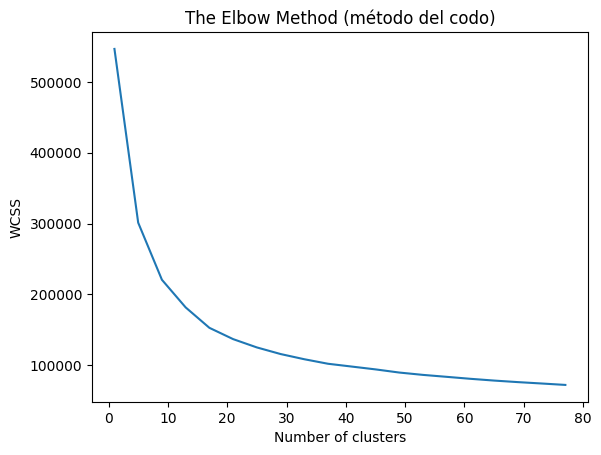

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,80,4):
    kmeans = KMeans(n_clusters=i, random_state=42,init = 'k-means++')
    kmeans.fit(dfEST_2.drop(['price_usd'],axis=1,inplace=False))
    wcss.append(kmeans.inertia_)

plt.plot(range(1,80,4), wcss)
plt.title('The Elbow Method (método del codo)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 30, init = 'k-means++') #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(dfEST_2.drop(['price_usd'],axis=1))
dfEST_2['k_means_class'] = pd.Series(y_kmeans).apply(lambda x: str(x))

px.scatter(dfEST_2,
          y = 'price_usd',
          x='year_produced',
          color='k_means_class',
          title='Grupos encontrados con k-means').show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
px.box(dfEST_2,
       x='k_means_class',
       y='price_usd',
       title='Box plot de price_usd agrupado por cada grupo de k_means',
       color='k_means_class',
       width=900,
       height=500)

#### Con<font color=blue> K-means</font> se encontraron 30 grupos que dividen el dataset, revisando la boxplot se ven algunos grupos con precios no muy esparcidos como el grupo 10, 2, 12, 24, 22 entre otros  

# <font color=blue> **Creando el modelo** </font>

### Se decide comparar cinco modelos:

#### - Regresión polinómica tomando solo las variables que muestran mejor correlación

#### - Regresión polinómica

#### - Random forest regresor

#### - Gradient boost

#### - Adaboost

#### estos últimos 4 tomando todas las columnas del dataset, exceptuando `price_usd`.


### Se procede a hacer un correolograma usando el método de <font color=blue>pearson</font> y <font color=blue>spearman</font> con las variables estandarizadas y las variables a las que se les aplicó one <font color=blue>hot encoding</font>, aquí solo se observaran las variables que tienen una <font color=blue>correlación </font>mayor a 0.45 con la varaiable 'precio_usd' (la variable a predecir)

In [ ]:
corr = dfEST_2.corr(method='spearman')
px.imshow(corr[abs(corr['price_usd'])>0.45][['price_usd']].sort_values('price_usd',ascending=False),
         text_auto=True,
         height=640,
         width=640,
         title = 'Correlograma variables estandarizadas y one hot encoding (spearman)').show()

In [ ]:
corr = dfEST_2.corr()
px.imshow(corr[abs(corr['price_usd'])>0.48][['price_usd']].sort_values('price_usd',ascending=False),
         text_auto=True,
         height=630,
         width=630,
         title = 'Correlograma de usando coeficiente de Pearson').show()

## <font color=blue> **Regresión polinomica** </font>

### Aplicando feature selection, usando las variables con mayor correlación `'year_produced'`,`'Gamma'`,`'transmission_or'`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(dfEST_2[['year_produced','transmission_or','Gamma']],
                                                    dfEST_2[['price_usd']],test_size=0.30,random_state=40)


poli_reg = PolynomialFeatures(degree = 2)
x_train_poli = poli_reg.fit_transform(x_train)
x_test_poli = poli_reg.fit_transform(x_test)

pr = LinearRegression()
pr.fit(x_train_poli,y_train)

y_predict_poli = pr.predict(x_test_poli)

modelo = []
r_2 = []
r_2_f =[]
MSE = []
RMSE = []
MAE = []

modelo.append('Polinomico_fs')
r_2.append(r2_score(y_test,y_predict_poli))
r_2_f.append(1 - (1-r2_score(y_test,y_predict_poli))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
MSE.append(mean_squared_error(y_test,y_predict_poli))
RMSE.append(mean_squared_error(y_test,y_predict_poli,squared=False))
MAE.append(mean_absolute_error(y_test,y_predict_poli))

## <font color=blue> **Regresión polinomica** </font>

### Sin aplicar feature selection (usando todas las variables para predecir)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(dfEST_2.drop(['price_usd'],axis=1),
                                                    dfEST_2[['price_usd']],test_size=0.30,random_state=40)


poli_reg = PolynomialFeatures(degree = 2)
x_train_poli = poli_reg.fit_transform(x_train)
x_test_poli = poli_reg.fit_transform(x_test)

pr = LinearRegression()
pr.fit(x_train_poli,y_train)

y_predict_poli = pr.predict(x_test_poli)


modelo.append('Polinomico')
r_2.append(r2_score(y_test,y_predict_poli))
r_2_f.append(1 - (1-r2_score(y_test,y_predict_poli))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
MSE.append(mean_squared_error(y_test,y_predict_poli))
RMSE.append(mean_squared_error(y_test,y_predict_poli,squared=False))
MAE.append(mean_absolute_error(y_test,y_predict_poli))

## <font color=blue> **Random forest regressor** </font>

### se entrenará este modelo con los parámetros e hiperparámetros definidos por defecto

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(x_train,y_train.values.ravel())

y_predict_tree = forest.predict(x_test)

modelo.append('Forest regressor')
r_2.append(r2_score(y_test,y_predict_tree))
r_2_f.append(1 - (1-r2_score(y_test,y_predict_tree))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
MSE.append(mean_squared_error(y_test,y_predict_tree))
RMSE.append(mean_squared_error(y_test,y_predict_tree,squared=False))
MAE.append(mean_absolute_error(y_test,y_predict_tree))

## <font color=blue> **Gradient Boosting Regressor** </font>

### de igual forma se usan los parámetros e hiperparámetros definidos por defecto para entrear este modelo

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

gradient = ensemble.GradientBoostingRegressor()
gradient.fit(x_train, y_train.values.ravel())

y_predict_Gradient_boost = gradient.predict(x_test)

mse = mean_squared_error(y_test, y_predict_Gradient_boost)

#print("The mean squared error (MSE) on test set: {:.3f}".format(mse))

modelo.append('Gradient_boost')
r_2.append(r2_score(y_test,y_predict_Gradient_boost))
r_2_f.append(1 - (1-r2_score(y_test,y_predict_Gradient_boost))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
MSE.append(mean_squared_error(y_test,y_predict_Gradient_boost))
RMSE.append(mean_squared_error(y_test,y_predict_Gradient_boost,squared=False))
MAE.append(mean_absolute_error(y_test,y_predict_Gradient_boost))


## <font color=blue>**AdaBoost** </font>

### de igual forma se usan los parámetros e hiperparámetros definidos por defecto para entrear este modelo

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

ada = ensemble.AdaBoostRegressor()
ada.fit(x_train, y_train.values.ravel())

y_predict_AdaBoostRegressor = ada.predict(x_test)

mse = mean_squared_error(y_test, y_predict_AdaBoostRegressor)



modelo.append('ADA_BOOST')
r_2.append(r2_score(y_test,y_predict_AdaBoostRegressor))
r_2_f.append(1 - (1-r2_score(y_test,y_predict_AdaBoostRegressor))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
MSE.append(mean_squared_error(y_test,y_predict_AdaBoostRegressor))
RMSE.append(mean_squared_error(y_test,y_predict_AdaBoostRegressor,squared=False))
MAE.append(mean_absolute_error(y_test,y_predict_AdaBoostRegressor))

## <font color=blue> **Comparación de métricas** </font>

In [ ]:
validaciones = pd.DataFrame({'Modelo':modelo,
             'r_2':r_2,
             'r_2_ajustado':r_2_f,
             'Medium_square_error':MSE,
             'Root_medium_square_error':RMSE,
             'medium_absolute_error':MAE})
validaciones

Modelo       r_2  r_2_ajustado  Medium_square_error  \
0     Polinomico_fs  0.786928      0.786862         3.924895e+06   
1        Polinomico  0.878412      0.878185         2.239717e+06   
2  Forest regressor  0.933533      0.933409         1.224350e+06   
3    Gradient_boost  0.903985      0.903806         1.768643e+06   
4         ADA_BOOST  0.798509      0.798132         3.711577e+06   

   Root_medium_square_error  medium_absolute_error  
0               1981.134896            1391.483155  
1               1496.568352            1063.888107  
2               1106.503514             750.019521  
3               1329.903313             937.050267  
4               1926.545250            1541.110618

## El modelo que presentó mejores resultados fue el Forest regressor



### Se procede a ver la importancia de las variables de este modelo:

In [ ]:
importances = pd.DataFrame(index=x_train.columns,data=forest.feature_importances_).reset_index().sort_values(0,ascending=False)
importances.columns = ['feature','importance']
importances.head(12)

feature  importance
1             year_produced    0.664846
8                     Gamma    0.169751
3           engine_capacity    0.061899
16  manufacturer_name_label    0.026362
0            odometer_value    0.019862
5                up_counter    0.011557
17            k_means_class    0.010827
12         drivetrain_Front    0.010357
14          body_type_label    0.008942
13          drivetrain_Rear    0.004078
7           transmission_or    0.003503
15        engine_fuel_label    0.002666

### Se observa que de las 19 variables, con 12 se tiene el 99% de importancia para el modelo, además usando solo las 12 variables más importantes se detectó que el modelo es un poco más robuzto con lo cual se decide solo usar las 12 variables más importantes para el módelo.

In [ ]:
importances.head(12)['importance'].sum()

0.994651127306667

## <font color=blue> **Busqueda de mejores parámetros e hiperparámetros** </font>

### Ahora se procede a aplicar un grid randomized search para encontrar los mejores parámetros para el modelo

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#regr = ensemble.GradientBoostingRegressor()
reg = RandomForestRegressor()

param_grid_ = {
    "n_estimators": [50,100,130,150],
    "max_depth":[None,35,15,25],
    "min_samples_split":[2,10],
    "max_leaf_nodes":[None,200,100]
}

GS = RandomizedSearchCV(estimator = reg,
                   scoring='neg_root_mean_squared_error',
                   #refit = 'neg_root_mean_squared_error',
                   param_distributions=param_grid_,
                  cv = 4,
                  verbose=4)

In [ ]:
features =  list(importances.head(12)['feature']) + ['price_usd']
x_train, x_test, y_train, y_test = train_test_split(dfEST_2[features].drop(['price_usd'],axis=1),
                                                  dfEST_2[['price_usd']],
                                                            test_size=0.30,
                                                            random_state=42)
GS.fit(x_train,y_train.values.ravel())

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END max_depth=15, max_leaf_nodes=None, min_samples_split=10, n_estimators=50;, score=-1167.655 total time=   2.8s
[CV 2/4] END max_depth=15, max_leaf_nodes=None, min_samples_split=10, n_estimators=50;, score=-1168.980 total time=   2.7s
[CV 3/4] END max_depth=15, max_leaf_nodes=None, min_samples_split=10, n_estimators=50;, score=-1159.605 total time=   3.1s
[CV 4/4] END max_depth=15, max_leaf_nodes=None, min_samples_split=10, n_estimators=50;, score=-1151.244 total time=   3.1s
[CV 1/4] END max_depth=35, max_leaf_nodes=100, min_samples_split=10, n_estimators=50;, score=-1396.273 total time=   1.6s
[CV 2/4] END max_depth=35, max_leaf_nodes=100, min_samples_split=10, n_estimators=50;, score=-1385.503 total time=   1.6s
[CV 3/4] END max_depth=35, max_leaf_nodes=100, min_samples_split=10, n_estimators=50;, score=-1401.547 total time=   1.6s
[CV 4/4] END max_depth=35, max_leaf_nodes=100, min_samples_split=10, n_estimators

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 35, 15, 25],
                                        'max_leaf_nodes': [None, 200, 100],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 100, 130, 150]},
                   scoring='neg_root_mean_squared_error', verbose=4)

In [ ]:
print(GS.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'max_leaf_nodes': None, 'max_depth': 25}


In [ ]:
params = GS.best_params_

reg = ensemble.RandomForestRegressor(**params)
reg.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_depth=25)

In [ ]:
#y_predict_Random_forest = pred
y_predict_Random_forest = reg.predict(x_test)

mse = mean_squared_error(y_test,y_predict_Random_forest)

#print("The mean squared error (MSE) on test set: {:.3f}".format(mse))


r2_score(y_test,y_predict_Random_forest)

0.9334669763440862

## <font color=blue> **Validando el modelo con diferentes métricas** </font>

In [ ]:
1 - (1-r2_score(y_test,y_predict_Random_forest))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9333840863644484

In [ ]:
mean_squared_error(y_test,y_predict_Random_forest)

1200998.3333507893

In [ ]:
mean_squared_error(y_test,y_predict_Random_forest,squared=False)

1095.9006950224957

In [ ]:
mean_absolute_error(y_test,y_predict_Random_forest)

745.5398137236373

In [ ]:
y_test['prediccion'] = np.array(y_predict_Random_forest)

px.line(y_test.sort_values('price_usd'),
       x='price_usd',
       y='prediccion',
       title='Predicción ramdom forest regressor vs Precio real').show()
y_test.drop('prediccion',axis=1,inplace=True)

### Se observa que en algunos pocos casos el error del random forest es grande sin embargo, para la mayoría de vehículos se tiene un presdicción con un margen de error menor a los 700 dólares.

## <font color=blue> **Robuztes del modelo** </font>

## K folds cross validation
### se decide usar la métrica de evaluvación MAE, pues es la más fácil de intertrepetar.

In [ ]:
from sklearn.model_selection import cross_val_score
reg = ensemble.RandomForestRegressor(**params)
scores = cross_val_score(reg,dfEST_2[features].drop('price_usd',axis=1),dfEST_2['price_usd'], cv=4,scoring = 'neg_mean_absolute_error')
scores

array([-1023.55788197,  -990.19103479, -1203.77774504, -1147.23684521])

In [ ]:
from sklearn.model_selection import cross_val_score
reg = RandomForestRegressor(**params)
#reg = ensemble.GradientBoostingRegressor(**params)
scores = cross_val_score(reg,dfEST_2.drop('price_usd',axis=1),dfEST_2['price_usd'], cv=5,scoring = 'neg_mean_absolute_error')
scores

array([ -967.87840947, -1069.17459233, -1100.64544649, -1176.5813043 ,
       -1213.01629577])

In [ ]:
from sklearn.model_selection import cross_val_score
reg = RandomForestRegressor(**params)
scores = cross_val_score(reg,dfEST_2.drop('price_usd',axis=1),dfEST_2['price_usd'], cv=6,scoring = 'neg_mean_absolute_error')
scores

array([-1039.97374717,  -969.0925675 ,  -846.39027797, -1311.75034906,
       -1128.30862211, -1156.55238841])

### Se observa que la robuztes del modelo es aceptable. También lo es el sesgo.

# <font color=blue> **Conclusiones del modelo** </font>









### El modelo resultante fue un Random Forest regresor que para predecir el valor de un vehículo toma como insumo las siguientes  12 variables:

- `year_produced`
- `Gamma` (variable que se crea en el procesamiento del modelo y se obtiene con el `model_name`).
- `engine_capacity` cm^3.
- `manufacturer_name_label` (esta variable que se crea en el procesamiento a partir del `manufacturer_name` del vehículo).
- `odometer_value` km.
- `k_means_class` clase que se crea en el procesamiento aplicando kmeans con todas las variables de este listado (n_clusters=30).
- `up_counter` número de veces que el vehículo ha sido reparado.
- `drivetrain_Front` ¿la ubicación del motor está al frente? 0 o 1
- `body_type_label` tipo de cuerpo del vehículo, sedan, van, limosina, Coupe, Hatchback, etc está variable se crea en el procesamiento usando el `body_type`.
- `drivetrain_Rear` ¿la ubicación del motor está atrás? 0 o 1
- `engine_fuel_label` ¿Gasolina, diesel o gas? (esta variable que se crea en el procesamiento a partir del `engine_fuel` del vehículo)
- `engine_type_Diesel` ¿Es tipo de motor diesel? 0 o 1


Una principal limitante del modelo es que solo pude predecir el valor de vehículos con `model_name` con los que haya sido entrenado, en otras palabras si en el set de entrenamiento del modelo no hay un `model_name`, Astra el módelo no podrá predecir el valor de vehículos con ese `model_name`.


# <font color=blue> **Opciones para reducir el sesgo y aumentar la robuztes del modelo**</font>


### Unas opciones que reducen el sesgo del modelo, pero restringen los vehículos a los que se les puede predecir el valor es son:

- Una forma en la que el modelo puede reducir más el sesgo es restringiendo los vehículos de los que puede predecir el valor a los `model_name` y `year_produced`, o sea si en el set de entrenamiento no hay ningún vehículo con `model_name` Astra y `year_produced` 2005 el modelo no puede predecir el valor de este vehículo aunque haya sido entrenado con modelos de vehículos Astra de otros años.

- Hacer un modelo para cada `model_name` sin embargo, el modelo resultante es poco práctico y díficil de evaluar o aplicarle una busqueda de parámetros más óptimos.